In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = yf.download("BTC-USD")[['Close']]


[*********************100%***********************]  1 of 1 completed


In [4]:
data.index = pd.to_datetime(data.index)
data.head().round(2)

,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


In [5]:
data.shape

(2703, 1)

In [6]:
data.tail()

,Close
Date,
2022-02-05,41441.164062
2022-02-06,42412.433594
2022-02-07,43840.285156
2022-02-08,44118.445312
2022-02-09,44493.636719


Text(0.5, 1.0, 'Bitcoin price')

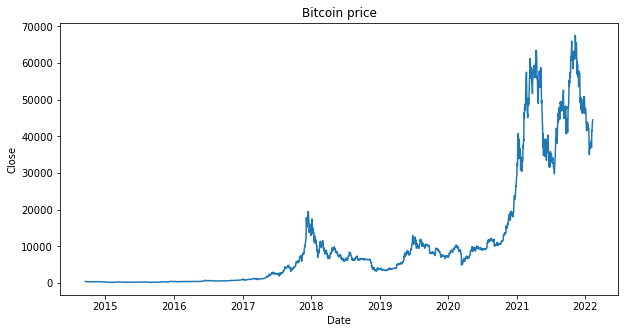

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.Close)
plt.title('Bitcoin price')

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -0.98
5% Critical Value: -2.86
p-value: 0.76


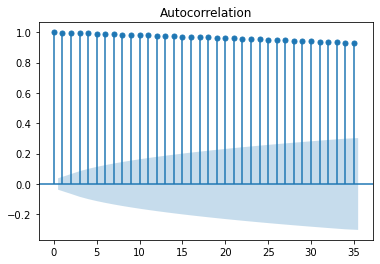

In [9]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(data.Close)
plt.show()

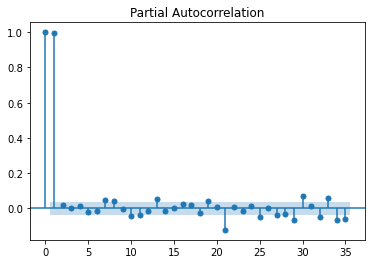

In [10]:
plot_pacf(data.Close)
plt.show()

In [11]:
data['differ'] = data['Close'].diff()
data.head()


,Close,differ
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-32.894012
2014-09-19,394.795990,-29.644012
2014-09-20,408.903992,14.108002
2014-09-21,398.821014,-10.082977


Text(0.5, 1.0, 'Bitcoin price')

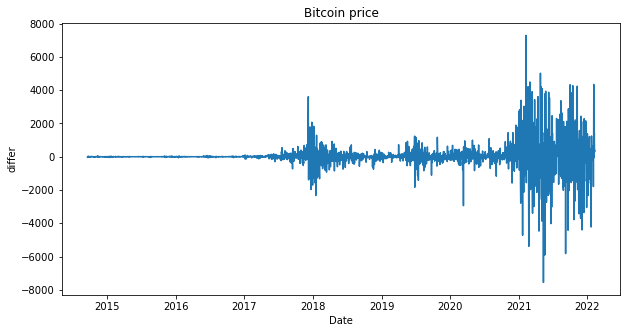

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.differ)
plt.title('Bitcoin price')

In [13]:
result = adfuller(data.differ.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -8.54
5% Critical Value: -2.86
p-value: 0.00


In [14]:
from statsmodels.tsa.arima_model import ARMA
mod_ar1 = ARMA(data.differ.dropna(), order=(1, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2702
Model:                     ARMA(1, 0)   Log Likelihood              -21792.746
Method:                       css-mle   S.D. of innovations            770.065
Date:                Wed, 09 Feb 2022   AIC                          43591.492
Time:                        23:01:20   BIC                          43609.197
Sample:                    09-18-2014   HQIC                         43597.894
                         - 02-09-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.2977     14.455      1.127      0.260     -12.034      44.630
ar.L1.differ    -0.0249      0.019     -1.292      0.196      -0.063       0.013
                                    Roots   

In [15]:
from statsmodels.tsa.arima_model import ARIMA

p=range(5)
q=range(5)
d=range(5)
order_list = [(x,y,z) for x in p for y in q for z in d] 

In [16]:
mod_ar2 = ARMA(data.differ.dropna(), order=(10, 0))
res_ar2 = mod_ar2.fit()
print(res_ar2.summary())

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2702
Model:                    ARMA(10, 0)   Log Likelihood              -21772.006
Method:                       css-mle   S.D. of innovations            764.160
Date:                Wed, 09 Feb 2022   AIC                          43568.012
Time:                        23:01:26   BIC                          43638.833
Sample:                    09-18-2014   HQIC                         43593.622
                         - 02-09-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.2977     16.701      0.976      0.329     -16.436      49.031
ar.L1.differ     -0.0293      0.019     -1.525      0.127      -0.067       0.008
ar.L2.differ      0.0078      0.019     

In [17]:
mod_ma1 = ARMA(data.differ.dropna(), order=(0, 1))
res_ma1 = mod_ma1.fit()
print(res_ma1.summary())

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2702
Model:                     ARMA(0, 1)   Log Likelihood              -21792.750
Method:                       css-mle   S.D. of innovations            770.066
Date:                Wed, 09 Feb 2022   AIC                          43591.499
Time:                        23:01:32   BIC                          43609.205
Sample:                    09-18-2014   HQIC                         43597.902
                         - 02-09-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.2977     14.448      1.128      0.259     -12.020      44.616
ma.L1.differ    -0.0247      0.019     -1.290      0.197      -0.062       0.013
                                    Roots   

In [18]:
mod_ma2 = ARMA(data.differ.dropna(), order=(0, 10))
res_ma2 = mod_ma2.fit()
print(res_ma2.summary())

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2702
Model:                    ARMA(0, 10)   Log Likelihood              -21769.827
Method:                       css-mle   S.D. of innovations            763.539
Date:                Wed, 09 Feb 2022   AIC                          43563.653
Time:                        23:01:38   BIC                          43634.474
Sample:                    09-18-2014   HQIC                         43589.263
                         - 02-09-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.2977     16.896      0.965      0.335     -16.818      49.413
ma.L1.differ     -0.0287      0.019     -1.497      0.135      -0.066       0.009
ma.L2.differ      0.0163      0.019     

In [19]:
train = data['differ'][0:int(len(data.differ)*0.8)]
test = data['differ'][int(len(data.differ)*0.8):]
print(len(train))
print(len(test))

2162
541


In [20]:
test.head()

Date
2020-08-18   -263.168945
2020-08-19   -232.950195
2020-08-20    120.088867
2020-08-21   -285.882812
2020-08-22     89.335938
Name: differ, dtype: float64

In [21]:
mod_ar1 = ARMA(train.dropna(), order=(1, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2161
Model:                     ARMA(1, 0)   Log Likelihood              -15281.779
Method:                       css-mle   S.D. of innovations            285.056
Date:                Wed, 09 Feb 2022   AIC                          30569.558
Time:                        23:01:42   BIC                          30586.593
Sample:                    09-18-2014   HQIC                         30575.788
                         - 08-17-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.4591      6.235      0.876      0.381      -6.761      17.679
ar.L1.differ     0.0165      0.022      0.766      0.443      -0.026       0.059
                                    Roots   

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [22]:
predictions_ar1 = res_ar1.predict(test.index[0],test.index[-1])


In [23]:
from statsmodels.tools.eval_measures import rmse
rmse_ar1 = rmse(test,predictions_ar1)
rmse_ar1

1624.6439236537985

In [24]:
mod_ma1 = ARMA(train.dropna(), order=(0, 1))
res_ma1 = mod_ma1.fit()
print(res_ma1.summary())

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2161
Model:                     ARMA(0, 1)   Log Likelihood              -15281.774
Method:                       css-mle   S.D. of innovations            285.055
Date:                Wed, 09 Feb 2022   AIC                          30569.548
Time:                        23:01:43   BIC                          30586.583
Sample:                    09-18-2014   HQIC                         30575.778
                         - 08-17-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.4591      6.235      0.876      0.381      -6.761      17.679
ma.L1.differ     0.0168      0.022      0.773      0.439      -0.026       0.059
                                    Roots   

In [25]:
predictions_ma1 = res_ma1.predict(test.index[0],test.index[-1])
rmse_ma1 = rmse(test,predictions_ma1)
rmse_ma1

1624.6439274246181

In [26]:
comparison_models = pd.DataFrame({'model': ['AR(1)','MA(1)'],'RMSE': [rmse_ar1, rmse_ma1], 'AIC': [res_ar1.aic, res_ma1.aic], 'BIC': [res_ar1.bic, res_ma1.bic]})
comparison_models

,model,RMSE,AIC,BIC
0,AR(1),1624.643924,30569.557931,30586.592910
1,MA(1),1624.643927,30569.547704,30586.582683


In [27]:
def optimize_ARMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in (order_list):
        try: 
            model = ARMA(exog, order=order).fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic, model.bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q)', 'AIC', 'BIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [28]:
p = range(5)
q =range(5)
order_list = [(x,y) for x in p for y in q] 

In [29]:
result_arma = optimize_ARMA(order_list, data.differ.dropna())

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was 

In [30]:
result_arma


,"(p, q)",AIC,BIC
0,"(2, 3)",43559.820919,43601.133151
1,"(4, 2)",43560.439727,43607.653707
2,"(2, 2)",43570.250918,43605.661403
3,"(3, 3)",43573.651014,43620.864994
4,"(3, 4)",43575.517748,43628.633476
5,"(4, 3)",43575.518485,43628.634213
6,"(0, 4)",43589.403377,43624.813863
7,"(2, 4)",43590.422973,43637.636953
8,"(4, 0)",43590.537699,43625.948184
9,"(1, 4)",43590.879619,43632.191851


In [31]:
result_arma[result_arma.AIC == result_arma.AIC.min()]


,"(p, q)",AIC,BIC
0,"(2, 3)",43559.820919,43601.133151


In [32]:
test_prediction = pd.date_range("2022-02-02", periods=6, freq="D")
test_prediction


DatetimeIndex(['2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07'],
              dtype='datetime64[ns]', freq='D')

In [33]:
data.loc['2022-02-02 00:00:00', 'Close']


36952.984375

In [34]:
mod_arima224 = ARIMA(data.differ.dropna(), order=(2,2,4))
res_arima224 = mod_arima224.fit()
print(res_arima224.summary())


C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             ARIMA Model Results                              
Dep. Variable:              D2.differ   No. Observations:                 2700
Model:                 ARIMA(2, 2, 4)   Log Likelihood              -21762.127
Method:                       css-mle   S.D. of innovations                nan
Date:                Wed, 09 Feb 2022   AIC                          43540.254
Time:                        23:02:59   BIC                          43587.462
Sample:                    09-20-2014   HQIC                         43557.326
                         - 02-09-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9.875e-06      0.000      0.065      0.948      -0.000       0.000
ar.L1.D2.differ    -0.4806      0.004   -121.651      0.000      -0.488      -0.473
ar.L2.D2.differ    -0.9812      

In [35]:
predictions = res_arima224.predict(start='2022-02-02 00:00:00', end='2022-02-07 00:00:00')

In [36]:
def predictions_5(predictions):
	'''
	This function goes back to the price based on the values of diff predicted by the model
	'''
	result=[data.loc['2022-01-19 00:00:00', 'Close']]
	for i in range(1,6):
		result.append(result[-1]+predictions[i])
	return result

In [37]:
result = predictions_5(predictions)


In [38]:
result

[41744.328125,
 45237.21728767139,
 43582.12136056158,
 35189.60714820336,
 39252.207203129125,
 37419.04276114793]